# Definition of the problem to be solved


In this study we will classify alexa product reviews. Comments will be analyzed and classified as positive or negative.

Database: www.kaggle.com/sid321axn/amazon-alexa-reviews

# Step 1: Libary import

In [32]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers import Dense

# Step 2: Database import

In [12]:
df_alexa = pd.read_csv('/content/amazon-alexa.tsv', sep = '\t')

In [13]:
df_alexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [14]:
df_alexa.tail(10)

,rating,date,variation,verified_reviews,feedback
3140,4,30-Jul-18,White Dot,Barry,1
3141,3,30-Jul-18,Black Dot,,1
3142,4,30-Jul-18,White Dot,My three year old loves it. Good for doing ba...,1
3143,5,30-Jul-18,Black Dot,Awesome device wish I bought one ages ago.,1
3144,5,30-Jul-18,Black Dot,love it,1
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


# Step 3: Data visualization


In [15]:
positive = df_alexa[df_alexa['feedback'] == 1]
positive

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [16]:
negative = df_alexa[df_alexa['feedback'] == 0]
negative

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


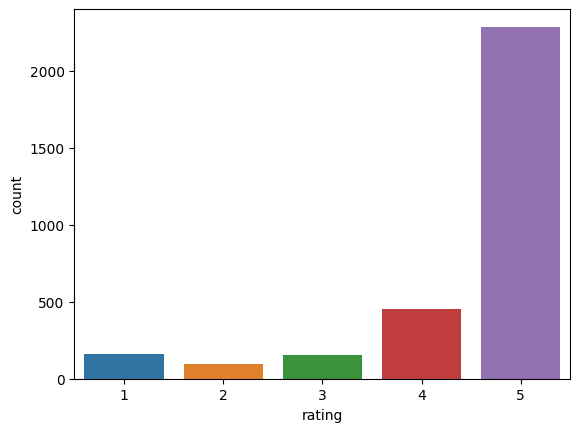

In [21]:
sns.countplot(x = 'rating', data = df_alexa);

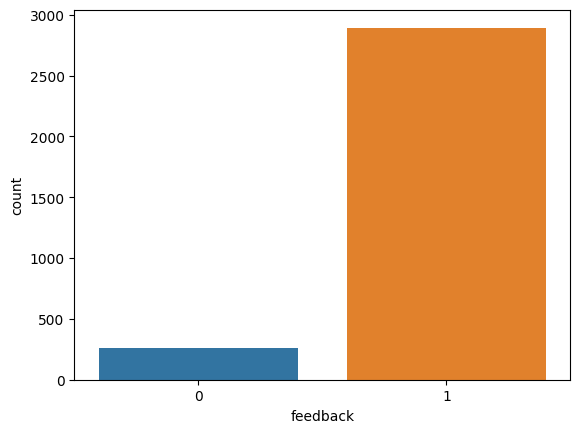

In [22]:
sns.countplot(x = 'feedback', data = df_alexa);

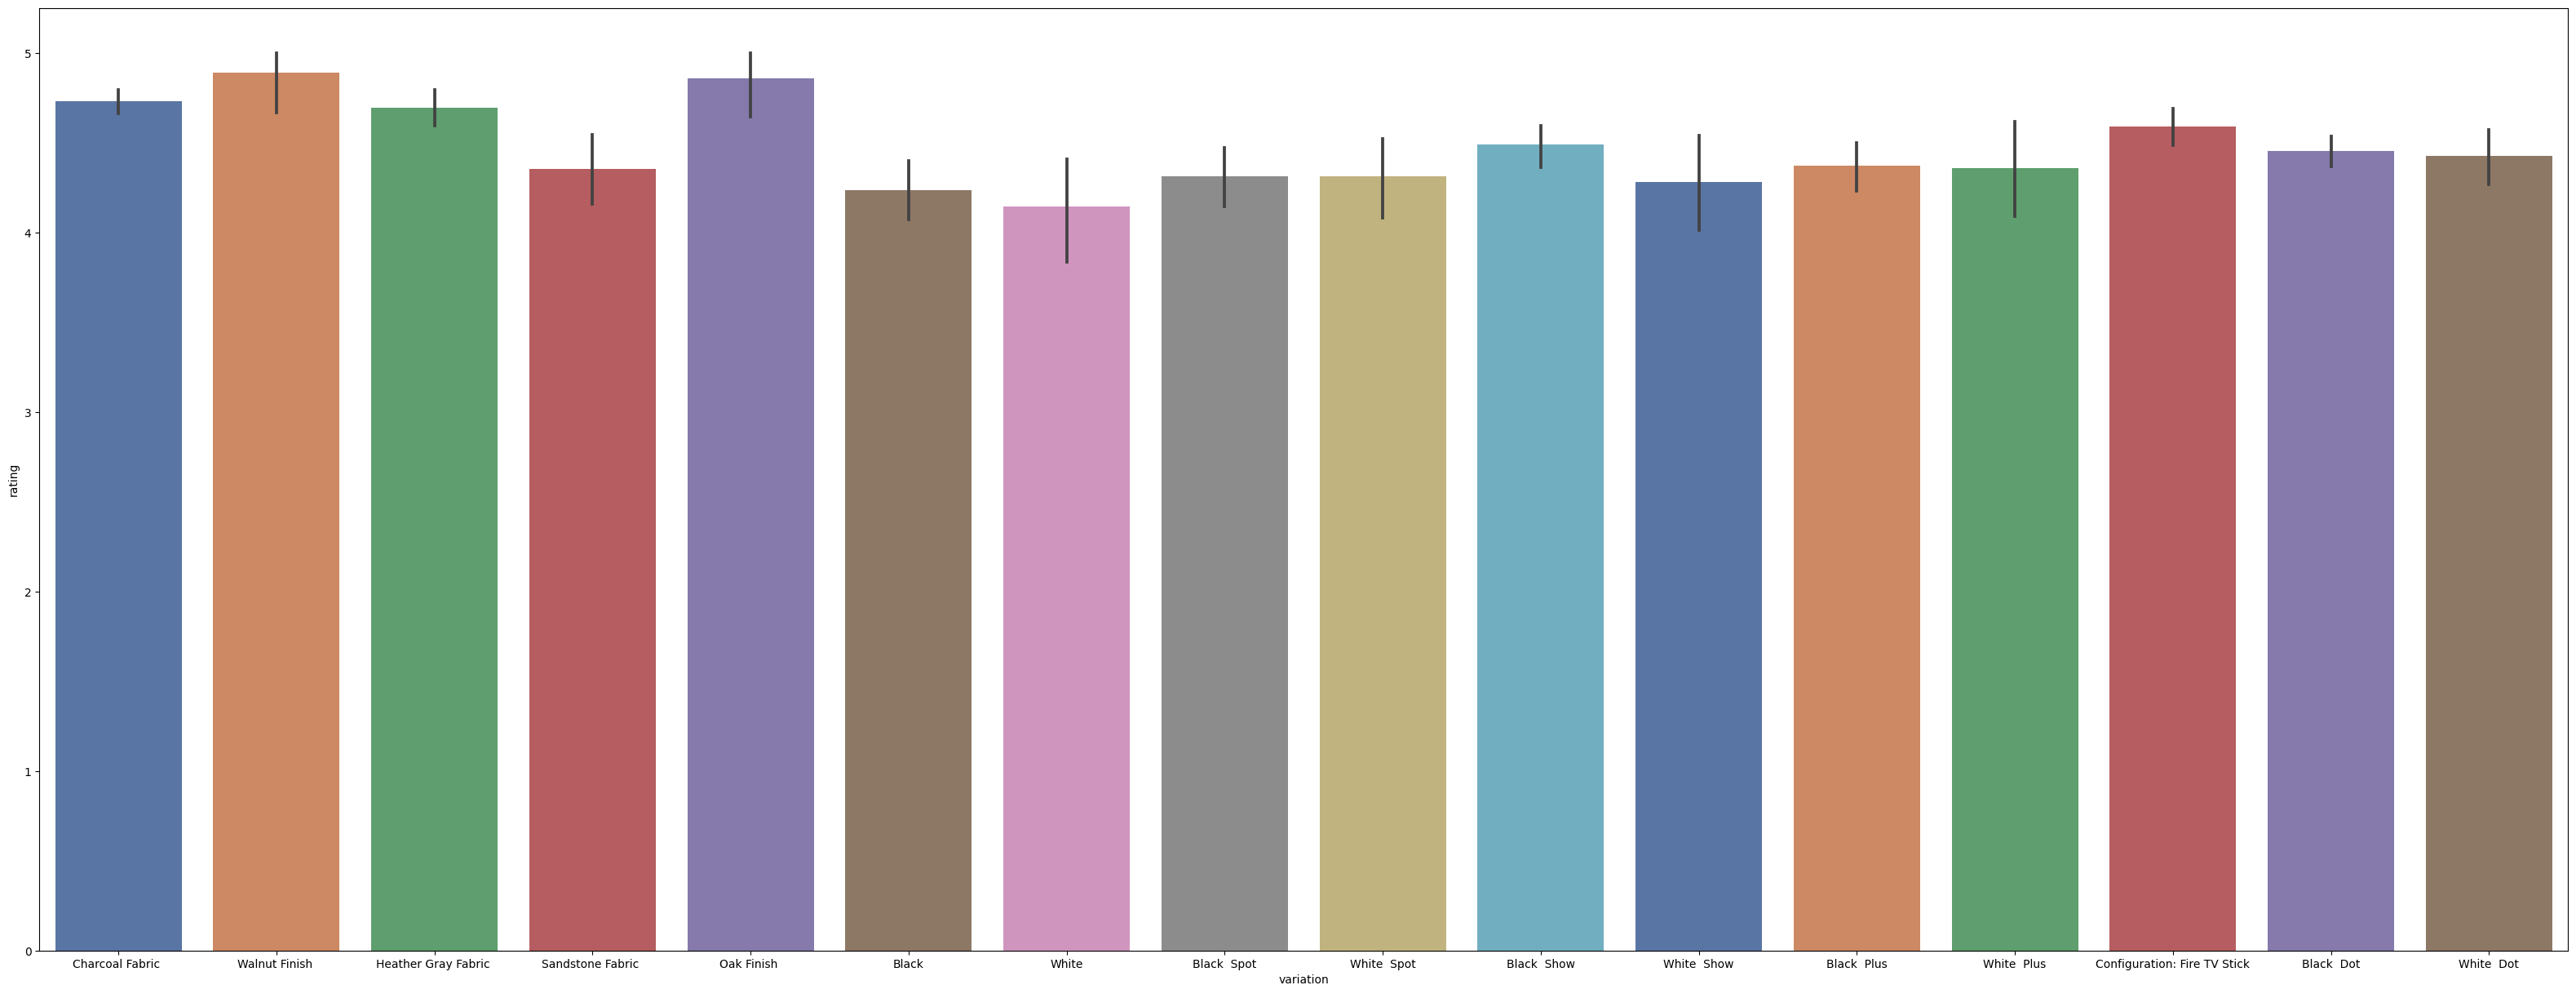

In [23]:
plt.figure(figsize = (40,15))
sns.barplot(x = 'variation', y = 'rating', data = df_alexa, palette = 'deep');

# Stpe 4: Data cleaning

In [24]:
df_alexa = df_alexa.drop(['date', 'rating'], axis = 1)

In [25]:
df_alexa.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [26]:
variation_dummies = pd.get_dummies(df_alexa['variation'])

In [28]:
df_alexa = df_alexa.drop(['variation'], axis = 1)

In [29]:
df_alexa.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [30]:
df_alexa = pd.concat([df_alexa, variation_dummies], axis = 1 )

In [31]:
df_alexa.head()

,verified_reviews,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


**Database tokenization**

In [33]:
vectorizer = CountVectorizer()
alexa_countvectorizer = vectorizer.fit_transform(df_alexa['verified_reviews'])

In [34]:
alexa_countvectorizer.shape

(3150, 4044)

In [35]:
print(vectorizer.get_feature_names_out())

['00' '000' '07' ... 'zzzz' 'zzzzzzz' 'útil']


In [36]:
df_alexa = df_alexa.drop(['verified_reviews'], axis = 1)

In [37]:
df_alexa.head()

,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [38]:
reviews = pd.DataFrame(alexa_countvectorizer.toarray())

In [39]:
reviews.head()

,0,1,2,3,4,5,6,7,8,9,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df_alexa = pd.concat([df_alexa, reviews], axis = 1)

In [42]:
df_alexa.head()

,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
x = df_alexa.drop(['feedback'], axis = 1)

In [44]:
x.head()

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
y = df_alexa['feedback']

In [46]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [48]:
x_train.shape

(2520, 4060)

# **Step 5:** Model building and training

In [51]:
classifier = Sequential()
classifier.add(Dense(units = 400, activation = 'relu', input_shape = (4060,)))
classifier.add(Dense(units = 400, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [52]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 400)               1624400   
                                                                 
 dense_4 (Dense)             (None, 400)               160400    
                                                                 
 dense_5 (Dense)             (None, 1)                 401       
                                                                 
Total params: 1785201 (6.81 MB)
Trainable params: 1785201 (6.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [54]:
epochs_hist = classifier.fit(x_train, y_train, epochs = 10)

Epoch 1/10
79/79 [==============================] - 3s 15ms/step - loss: 0.2671 - accuracy: 0.9218
Epoch 2/10
79/79 [==============================] - 1s 12ms/step - loss: 0.0894 - accuracy: 0.9611
Epoch 3/10
79/79 [==============================] - 1s 11ms/step - loss: 0.0306 - accuracy: 0.9909
Epoch 4/10
79/79 [==============================] - 1s 11ms/step - loss: 0.0180 - accuracy: 0.9933
Epoch 5/10
79/79 [==============================] - 1s 11ms/step - loss: 0.0171 - accuracy: 0.9944
Epoch 6/10
79/79 [==============================] - 1s 11ms/step - loss: 0.0170 - accuracy: 0.9940
Epoch 7/10
79/79 [==============================] - 1s 11ms/step - loss: 0.0146 - accuracy: 0.9948
Epoch 8/10
79/79 [==============================] - 1s 11ms/step - loss: 0.0155 - accuracy: 0.9948
Epoch 9/10
79/79 [==============================] - 1s 11ms/step - loss: 0.0154 - accuracy: 0.9940
Epoch 10/10
79/79 [==============================] - 1s 11ms/step - loss: 0.0162 - accuracy: 0.9933


# Step 6: Model evaluation

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
y_pred_train = classifier.predict(x_train)

79/79 [==============================] - 0s 3ms/step


In [57]:
y_pred_train = (y_pred_train > 0.5)

In [58]:
y_pred_train

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [59]:
cm = confusion_matrix(y_train, y_pred_train)
cm

array([[ 189,    9],
       [   5, 2317]])

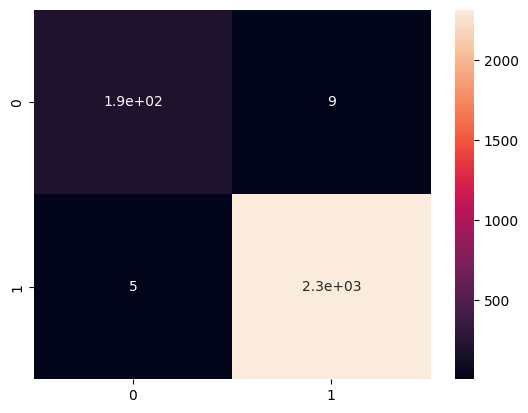

In [60]:
sns.heatmap(cm, annot = True);

In [61]:
y_pred_test = classifier.predict(x_test)
y_pred_test = (y_pred_test > 0.5)
cm = confusion_matrix(y_test, y_pred_test)

20/20 [==============================] - 0s 5ms/step


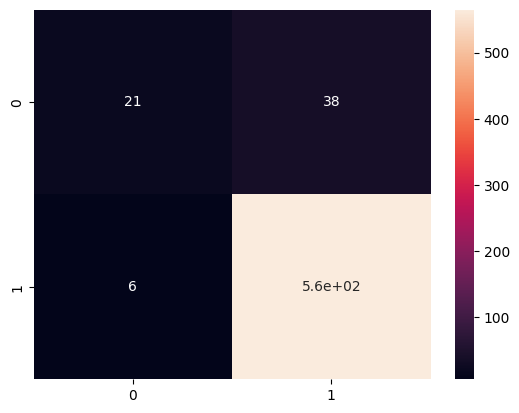

In [62]:
sns.heatmap(cm, annot = True);

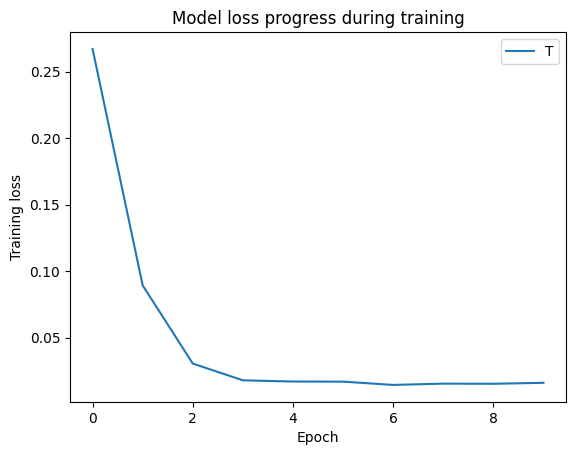

In [63]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend('Training loss');

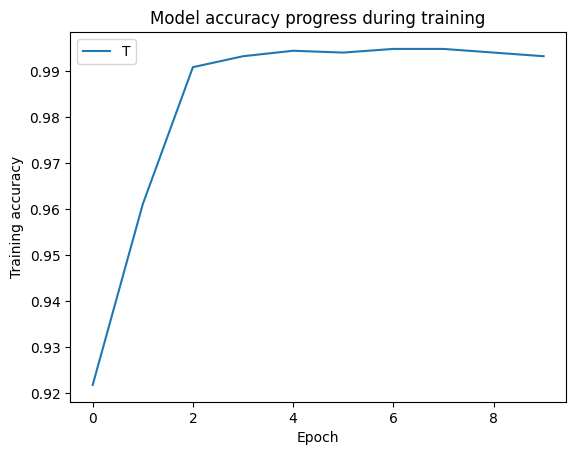

In [65]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model accuracy progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.legend('Training accuracy');